# Basic Numerical Integrators

One-step methods implemented: Euler's method, RK4

Multi-step methods implemented: AB(4)

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
import time
import numpy as np
from scipy.interpolate import lagrange

func = lambda t, y: y
exact = lambda t: np.exp(t)

# Returns time points after discretisation into N sub-intervals
def get_tvec(T, N):
    h = float(T)/N
    return np.arange(0, T+h, h)

In [2]:
# Euler's method
def ForwardsEuler(f, T, y0, N):
    '''
    Inputs:
    f:  the RHS of the system of ODEs y'=f(t,y)
    T:  integration interval[0,T]
    y0: initial condition
    N:  number of time intervals

    Output:
    y:  as function of time
    '''
    
    # time step
    h = float(T)/N
    
    # time points vector
    t = np.arange(0, T+h, h)
    
    # output vector
    y = np.zeros(N+1)
    
    # setting initial condition
    y[0] = y0
    
    # Forwards Euler method
    for i in range(N):
        y[i+1] = y[i] + h*f(t[i], y[i])
    
    return y, h, t 


In [3]:
# Runge-Kutta 4th order method
def RK4(f, T, y0, N):
    '''
    Inputs:
    f:  the RHS of the system of ODEs y'=f(t,y)
    T:  integration interval[0,T]
    y0: initial condition
    N:  number of time intervals

    Output:
    y:  as function of time
    '''
    
    # time step
    h = float(T)/N
    
    # time points vector
    t = np.arange(0, T+h, h)
    
    # output vector
    y = np.zeros(N+1)
    
    # setting initial condition
    y[0] = y0
    
    # RK4 method
    for i in range(N):
        y1 = f(t[i], y[i])
        y2 = f(t[i]+h/2, y[i]+h*y1/2)
        y3 = f(t[i]+h/2, y[i]+h*y2/2)
        y4 = f(t[i]+h, y[i]+h*y3)
        y[i+1] = y[i] + h*(y1 + 2*y2 + 2*y3 + y4)/6
    
    return y, h, t


In [4]:
# Adams-Bashforth 4th order method, with RK4 startup
def AB4_InitRK4(f, T, y0, N):
    '''
    Inputs:
    f:  the RHS of the system of ODEs y'=f(t,y)
    T:  integration interval[0,T]
    y0123: initial condition (first four y values are needed)
    N:  number of time intervals

    Output:
    y:  as function of time
    '''
    
    # time step
    h = float(T)/N
    
    # time points vector
    t = np.arange(0, T+h, h)
    
    # output vector
    y = np.zeros(N+1)
    
    # setting initial conditions (next three points)
    y[0:4] = RK4(f, t[3], y0, 3)[0]
    
    # AB-4 method
    for i in range(3, N):
        y[i+1] = y[i] + h*(55*f(t[i],y[i]) - 59*f(t[i-1],y[i-1]) + 37*f(t[i-2],y[i-2]) - 9*f(t[i-3],y[i-3]))/24
    
    return y, h, t


## Convergence Tests

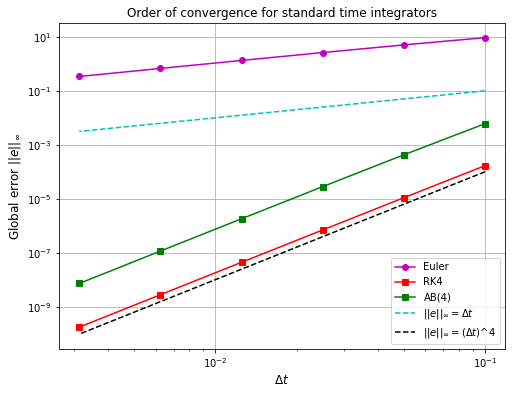

In [5]:
# Setting up parameters...
T = 4
y0 = 1

# list of number of intervals
Ns = [40*2**i for i in np.arange(6)]

# Delta t values (step sizes)
delts = [T/n for n in Ns]
delts_4 = [d**4 for d in delts]

# List of corresponding error vector inf norms for each step size
Euler_error = [np.linalg.norm(ForwardsEuler(func, T, y0, n)[0] - exact(get_tvec(T, n)), np.inf) for n in Ns]
RK4_error = [np.linalg.norm(RK4(func, T, y0, n)[0] - exact(get_tvec(T, n)), np.inf) for n in Ns]
AB4_mod_error = [np.linalg.norm(AB4_InitRK4(func, T, y0, n)[0] - exact(get_tvec(T, n)), np.inf) for n in Ns]

# Plotting results
plt.rcParams['figure.figsize'] = (8,6)
#plt.rc('font', size=10)
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=10)
plt.plot(delts, Euler_error, 'mo-', label=r'Euler')
plt.plot(delts, RK4_error, 'rs-', label=r'RK4')
plt.plot(delts, AB4_mod_error, 'gs-', label=r'AB(4)')
plt.plot(delts, delts, 'c--', label=r'$\|\|e\|\|_{\infty} = \Delta t$')
plt.plot(delts, delts_4, 'k--', label=r'$\|\|e\|\|_{\infty} = (\Delta t)$^4')
plt.xscale('log')
plt.yscale('log')
plt.title(r'Order of convergence for standard time integrators')
plt.xlabel(r'$\Delta t$')
plt.ylabel(r'Global error $\|\|e\|\|_{\infty}$')
plt.grid()
plt.legend(loc='lower right')
plt.show()

## Stability Regions

In [6]:
def ForwardsEuler_complex(f, T, y0, N):
    '''
    Inputs:
    f:  the RHS of the system of ODEs y'=f(t,y)
    T:  integration interval[0,T]
    y0: initial condition
    N:  number of time intervals

    Output:
    y:  as function of time
    '''
    
    # time step
    h = float(T)/N
    
    # time points vector
    t = np.arange(0, T+h, h)
    
    # output vector
    y = np.zeros(N+1)
    
    # setting initial condition
    if type(y0) == complex:
        y = [complex(0, 0) for y_ in y]
        y[0] = y0
    else:
        y[0] = y0
    
    # Forwards Euler method
    for i in range(N):
        y[i+1] = y[i] + h*f(t[i], y[i])
    
    return y, h, t 

Text(0.5, 1.0, 'Stability regions')

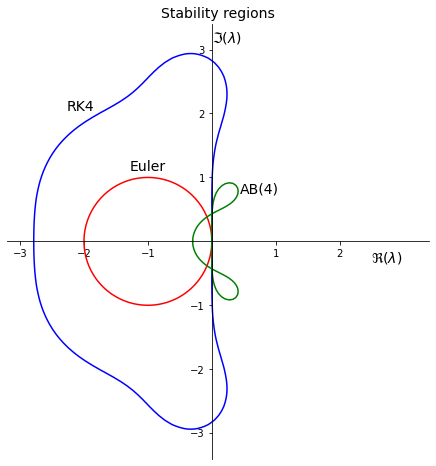

In [7]:
# Adapted from: 
# https://aquaulb.github.io/book_solving_pde_mooc/solving_pde_mooc/notebooks/02_TimeIntegration/02_02_RungeKutta.html

# Resolution of mesh grid
nx = 100
ny = 100
x = np.linspace(-3.5, 1.5, nx)
y = np.linspace(-3.5, 3.5, ny)
X, Y = np.meshgrid(x, y)

Z = X + 1j*Y

# Terms remaining from Taylor expansion for Euler's method
sigma1 = 1 + Z

# We compute the norm of sigma1.
norm1 = np.real(sigma1*sigma1.conj())

# Terms remaining from Taylor expansion for RK4.
sigmaRK4 = 1 + Z + Z**2/2. + Z**3/6. + Z**4/24.

# We compute the norm of sigmaRK4.
normRK4 = np.real(sigmaRK4*sigmaRK4.conj())

# Root condition definition for AB(4)
thetas = np.linspace(-np.pi, np.pi, 100)
rho = lambda c : 24*(c**4 - c**3)
sig = lambda c : 55*c**3 - 59*c**2 + 37*c - 9
exps = [complex(np.cos(t), np.sin(t)) for t in thetas]
zs = [rho(z)/sig(z) for z in exps]

reals = [z.real for z in zs]
imags = [z.imag for z in zs]

fig, ax = plt.subplots(figsize=(8,8))
ax.contour(X, Y, norm1, levels=[1], colors='r')
ax.contour(X, Y, normRK4, levels=[1], colors='b')
#ax.contour(X, Y, normAB4, levels=[1], colors='g')
ax.plot(reals, imags, 'g')

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('center')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

xmin, xmax = -3.2, 3.4
ymin, ymax = -3.4, 3.4

ax.set_xlim(xmin ,xmax)
ax.set_ylim(ymin, ymax)

# Axis labels
ax.set_xlabel(r'$\Re(\lambda)$', fontsize=14)
ax.set_ylabel(r'$\Im(\lambda)$', fontsize=14, rotation=0)

ax.xaxis.set_label_coords(0.9, 0.48)
ax.yaxis.set_label_coords(0.52, 0.95)

ax.set_xticks((-3, -2, -1, 1, 2))
ax.set_yticks((-3, -2, -1, 1, 2, 3))

# Contour labels
ax.text(-1, 1.1, r'Euler', fontsize=14, horizontalalignment='center')
ax.text(-2.05, 2.05, r'RK4', fontsize=14, horizontalalignment='center')
ax.text(0.75, 0.75, r'AB(4)', fontsize=14, horizontalalignment='center')

ax.set_aspect(1)

ax.set_title('Stability regions', fontsize=14)